### When people prepare GRO-Cap data, they usually also do GRO-Seq, which can be used as background for calling peaks. In addition, it is recommended to get biological replicates for both GRO-Cap and GRO-Seq data. In our pipeline, we call peaks using product combination of GRO-Cap and GRO-Seq. In other words, if we have m GRO-Cap and n GRO-Seq, we will have m* n peak result files. 
### Then it comes with a question, how to deal with these peaks in biological replicates?
#### To solve this problem, we need to see how consistent the peaks are beteen peaks that are called using biological replicates.

In [2]:
%matplotlib inline  
import pandas as pd
import glob
from natsort import natsorted
from pybedtools import BedTool
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib as mpl
import numpy as np
mpl.style.use('ggplot')
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

#### For m Gro-Cap samples and n Gro-Seq samples, we would have m times n peak results. For each peak result, we plot number of TSS against peak distance between biological replicates.

In [3]:
def get_rep_peak_dist(f1,f2):
    ''' this function gets the distance between overlapping peaks in two peak results
    These two peak files either use the same 5GRO or GRO, the different part is replicates
    for example: 5G1_G1 and 5G1_G2, the same 5GRO data using different GroSeq replicates as
    backround
    '''
    peak1 = pd.read_csv(f1,sep='\t',header=None,comment='#')
    peak2 = pd.read_csv(f2,sep='\t',header=None,comment='#')
    bed1 = BedTool.from_dataframe(peak1[[1,2,3,0,7,4]])
    bed2 = BedTool.from_dataframe(peak2[[1,2,3,0,7,4]])
    inter_bed = bed1.intersect(bed2,s=True,wo=True)
    inter_df = inter_bed.to_dataframe(names=['peak1','s_1','e_1','id_1','score_1','str_1',
                                            'peak2','s_2','e_2','id_2','score_2','str_2','len'])
    inter_df['tss1'] = ((inter_df['s_1']+inter_df['e_1'])/2).astype('int')
    inter_df['tss2'] = ((inter_df['s_2']+inter_df['e_2'])/2).astype('int')
    inter_df['peak_diff'] = (inter_df['tss1'] - inter_df['tss2']).abs()
    count = Counter(inter_df['peak_diff'])
    dist = range(150+1)
    total_tss = sum(count.values())
    tss_portion = [float(count[c]) for c in dist] # /total_tss
    return dist,tss_portion

def plot_sub(peak,ax,index):
    '''peak is a list of files
    '''
    x,y = get_rep_peak_dist(peak[index[0]],peak[index[1]])
    l, = ax.plot(x,y) # ,color=color)
#     _ = plt.ylim([0,1])
    _ = ax.set_xlim([-10,5])
    return l

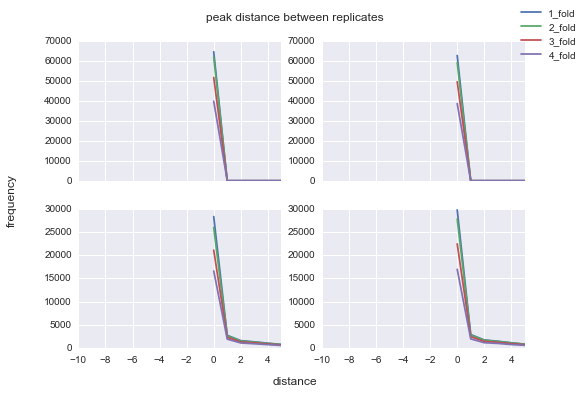

In [57]:
sns.set_palette("deep")
peak_folder = '/data/shangzhong/TSS/fq/peaks_n'
def wrap_distance_between_peak_replicates(peak_folder)
    peak_folders = natsorted(glob.glob(peak_folder+'/*'))
    peak_files = [natsorted(glob.glob(f+'/*.peak')) for f in peak_folders]
    n = len(peak_files[0])

    indexes = [[0,1],[2,3],[0,2],[1,3]]
    row = 2
    col = 2
    fig, ax = plt.subplots(nrows=row,ncols=col,sharex=True)#,sharey=True)
    for i in range(row):
        for j in range(col):
            index = indexes[i*col+j]
            lines = ()
            for peak in peak_files:
                l = plot_sub(peak,ax[i][j],index)
                lines += (l,)

    _ = fig.text(0.5, 0.96, 'peak distance between replicates', ha='center', va='center')
    _ = fig.text(0.5, 0.04, 'distance', ha='center', va='center')
    _ = fig.text(0.01, 0.5, 'frequency', ha='center', va='center', rotation='vertical')
    _ = fig.legend(lines,('1_fold','2_fold','3_fold','4_fold'),'upper right')
wrap_distance_between_peak_replicates(peak_folder)

#### Next we want to see the distribution of the distance between predicted TSS and annotated TSS

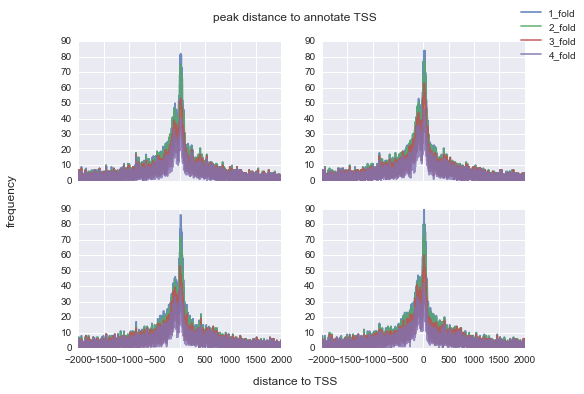

In [67]:
anno_path = '/data/shangzhong/TSS/fq/anno_peaks_n'
def wrap_distance_of_predict_tss_and_annotate_tss(anno_path):
    anno_fns = [natsorted(glob.glob(f+'/*.anno')) for f in natsorted(glob.glob(anno_path+'/*'))]
    anno_fd_fns = zip(*anno_fns)
    col = 2
    row = 2
    fig, ax = plt.subplots(nrows=row,ncols=col,sharex=True)#,sharey=True)
    for i in range(row):
        for j in range(col):
            index = i*col+j
            lines = ()
            for fn in anno_fd_fns[index]:
                df = pd.read_csv(fn,sep='\t',header=0)
                lst = dict(Counter(df['Distance to TSS'].tolist()))
                x = range(-2000,2000)
                y = [lst[pos] if pos in lst else 0 for pos in x]
                l, = (ax[i][j]).plot(x,y,alpha=0.8)
                lines += (l,)
    _ = fig.text(0.5, 0.96, 'peak distance to annotate TSS', ha='center', va='center')
    _ = fig.text(0.5, 0.04, 'distance to TSS', ha='center', va='center')
    _ = fig.text(0.01, 0.5, 'frequency', ha='center', va='center', rotation='vertical')
    _ = fig.legend(lines,('1_fold','2_fold','3_fold','4_fold'),'upper right')
wrap_distance_of_predict_tss_and_annotate_tss(anno_path)

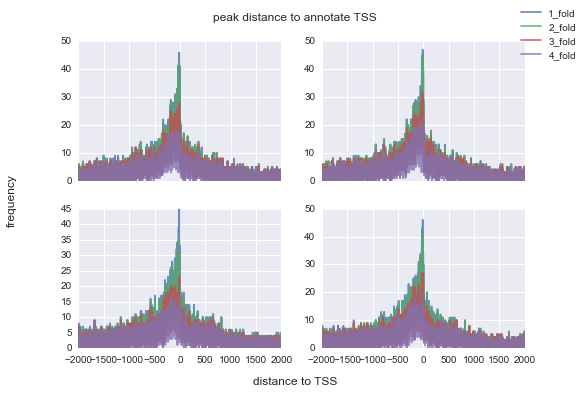

In [4]:
anno_path = '/data/shangzhong/TSS/fq/new_picr/anno_peaks_n'
def wrap_distance_of_predict_tss_and_annotate_tss(anno_path):
    anno_fns = [natsorted(glob.glob(f+'/*.anno')) for f in natsorted(glob.glob(anno_path+'/*'))]
    anno_fd_fns = zip(*anno_fns)
    col = 2
    row = 2
    fig, ax = plt.subplots(nrows=row,ncols=col,sharex=True)#,sharey=True)
    for i in range(row):
        for j in range(col):
            index = i*col+j
            lines = ()
            for fn in anno_fd_fns[index]:
                df = pd.read_csv(fn,sep='\t',header=0)
                lst = dict(Counter(df['Distance to TSS'].tolist()))
                x = range(-2000,2000)
                y = [lst[pos] if pos in lst else 0 for pos in x]
                l, = (ax[i][j]).plot(x,y,alpha=0.8)
                lines += (l,)
    _ = fig.text(0.5, 0.96, 'peak distance to annotate TSS', ha='center', va='center')
    _ = fig.text(0.5, 0.04, 'distance to TSS', ha='center', va='center')
    _ = fig.text(0.01, 0.5, 'frequency', ha='center', va='center', rotation='vertical')
    _ = fig.legend(lines,('1_fold','2_fold','3_fold','4_fold'),'upper right')
wrap_distance_of_predict_tss_and_annotate_tss(anno_path)

In [37]:
path  = '/data/shangzhong/Proteogenomics/stringtie'
genes = ['Bik','Bcl2','St6gal1','Ascl1','Neurod1']
gff = '/data/genome/hamster/picr/picr_draft.gff3'

In [3]:
#===============================================================================
#                 1. merge string tie quantification
#===============================================================================
def merge_stringtie_quant(path,ex_type='FPKM'):
    '''merge all quantification file in path
    '''
    dfs = []
    os.chdir(path)
    fns = natsorted(glob.glob(path+'/*.tab'))
    for f in fns:
        df = pd.read_csv(f,sep='\t',header=0,index_col=[0,1],low_memory=False)
        cri = df.index.map(lambda x: x[0].startswith('STRG.'))
        df = df[~cri]
        df = df[['TPM']].groupby([df.index]).sum()
        name = f.split('/')[-1].split('.')[0][5:]
        df = df.rename(columns={ex_type:name})
        dfs.append(df[[name]])
    
    # res = reduce(lambda left,right:pd.merge(left,right,on='Gene ID'),dfs)
    res = pd.concat(dfs,axis=1)
    res.insert(0,'name',res.index.map(lambda x: x[1]))
    res.insert(0,'gene_id',res.index.map(lambda x: x[0]))
    res.to_csv('../expression.txt',sep = '\t',index=False)

def run_taco(path,thread):
    '''this function runs taco
    * path: path to stringtie assemble result
    '''
    gtf_path = path + '/rna_assemble'
    fn = path+'/gtf_fl.txt'
    fl = natsorted([gtf_path+'/'+f for f in os.listdir(gtf_path)])
    with open(fn,'w') as f:
        f.write('\n'.join(fl)+'\n')
    taco_path = path + '/taco'
    if os.path.exists(taco_path): shutil.rmtree(taco_path)
    cmd = ('taco -p {t} -o {out} {fn}').format(t=str(thread),out=taco_path,fn=fn)
    print cmd
    sarge.run(cmd)
    
def run_gffcmp(path,taco_gtf,gff)
    '''this function compare taco assembly gtf with reference gff'''
    taco_path = path + '/taco'
    taco_gtf = taco_path + '/assembly.gtf'
    tacocmp = taco_path + '/tacocmp'
    cmd = 'gffcompare -R -r {gff} -o {out} {gtf}'.format(gff=gff,out=tacocmp,gtf=taco_gtf)
    print cmd
    sarge.run(cmd)

def get_tacogtf2ref_gff(path):
    #---- 4. extract the mapping id
    taco_path = path + '/taco'
    taco_ref = taco_path + '/tacocmp.assembly.gtf.refmap'
    taco_df = pd.read_csv(taco_ref,sep='\t',header=0)
    return taco_df[taco_df['ref_gene_id'].isin(genes)]

In [42]:
#========================== get expression of genes
#------ 1. get expression
def get_gene_expression(genes,ex_fn):
    '''this function print expression of selected genes in all samples'''
    ex_df = pd.read_csv(ex_fn,sep='\t',header=0,comment='#')
    gene_df = ex_df[ex_df['name'].isin(genes)]
    print 'gene expression table for all tissues in hamster'
    return gene_df
ex_fn = path + '/expression.txt'
# gene_df = print_gene_expression(genes,ex_fn)
# display(gene_df)

In [11]:
def main(path,genes,thread=12):
    '''
    * path: pathway to stringtie folder
    * genes: a list of interested genes
    '''
#     merge_stringtie_quant(path+'/quant','TPM')
#     run_taco(path,thread)
#     run_gffcmp(path,taco_gtf,gff)
    df = get_tacogtf2ref_gff(path)
    display(df)

     ref_gene_id        ref_id class_code    qry_id_list
0            Bik  XM_016965512          =       G10|TU11
1652     Neurod1  XM_007634400          =  G5394|TU11153


In [52]:
gff_df = pd.read_csv(gff,sep='\t',header=None,comment='#',names=['chr','source','feature','start','end','q1','strand','q2','anno'])
gff_df = gff_df[gff_df['feature'].values=='mRNA']
gff_df['gene_id'] = gff_df['anno'].map(lambda x: re.search('(?<=gene_id=).+?(?=;)',x).group())
gff_df['gene_name'] = gff_df['anno'].map(lambda x: re.search('(?<=gene_name=).+?(?=$)',x).group())

In [56]:
gene = ['Bak1','Bax','Casp3','Casp7','Ldha']
cri = gff_df['anno'].map(lambda x: any([g in x for g in gene]))
# 1. analyze refseq mapping
gene_df = gff_df[cri]
print('refseq alignment')
display(gene_df[['chr','gene_id','gene_name','start','end','strand']])
# 2.analyze taco results
taco_path = path + '/taco'

# # 3.analyze expression of the genes
# ex_fn = path + '/expression.txt'
# print ex_fn
# gene_ex_df = get_gene_expression([gene],ex_fn)
# gene_ex_df = gene_ex_df[]
# display(gene_ex_df)

refseq alignment


,chr,gene_id,gene_name,start,end,strand
236074,picr_154,100689368,Bak1,256269,259785,-
293570,picr_82,100689064,Ldha,324606,332950,+
293616,picr_31,100689061,Casp3,7574324,7582548,-
406856,picr_130,100689032,Bax,1543742,1549631,+
576137,picr_24,100766857,Casp7,5002969,5037181,-
576150,picr_24,100766857,Casp7,5008644,5023567,-
576161,picr_24,100766857,Casp7,5008644,5044989,-
576173,picr_24,100766857,Casp7,5008644,5039501,-


In [1]:
from Bio import SeqIO
fn = '/data/genome/hamster/picr/picr.fa'
dic = SeqIO.index(fn,'fasta')


In [3]:
seq = dic['picr_54'].seq[12752137-1000:12752137]
print str(seq)

TGGCTGTTCTGCGCTCTGTCCTGCGATGGAACCCTCCGTTCTCCTGATTGGCTAGACAACCACCTGCGCTCTCCCGGGATTGGGCACTGGCAGAGCTGCGCGGTTCCCCGCTCTCTGATTCGCCGCGCGGGCAGCTCACGGCCTGCACACTGAATGGCTGCGCCACTACCTGCAATCGGCCTCGGATTGGGTGCGTGGCGCCTCCCCGGCGTGATAGGTCAGGACCACCGCCCCCCTTGCTCCCCATTGGTTGCTCGCCGGAGCCCGGTCTCCGGGTAAGATGGCAGCGGACGGACAGTGCTCGCTCCCCGCTTCATGGCGGCCGGTGACCCTCACCCACGTCGAATATCCTGCAGGTAAGAGGCGGCCACGGTCCCGAGGACGTTCTCCGGGAGCCGGCGCCGCAGCCTCGGGCGCTCCAGGCCGCGTGGGCCGGCGTGGGGGCGCCGGAGCACCGCGGTGGGAACTGTCAAACAGCGAGCCATGGAGGGGCTCGGCCGGCGCGCGCGCCGCGCAGGCGCAGTGAGGCGGCGATGAGCTGGGCGAAATTGTAAGCGGCTCGCTAGTGCACTCTGCGGCTGCGCGGCCGAGTCGCTCTCCGGGGTCCCGGGGTGCTGGTGGGCTGTCCTGGGCCTGAGGCTTGGGTGGGGCGGGCAAGGATCTGGTCCTGGACCTTGTCCCTTGTGCCCCGCCCTCCCCTGAGCCAGAGAGGCCGCACTCCTGCTGGGGCGTGCTGGGAGTGCCAGTTTCCTTCACTATGCTGTGGGCTGCTTGCTGGAGAAAGCTCTCTGTTGCAGGGAGTGTACAAGTCCAGGCCAGGTTTGGGAGGATTTGCAGCGCCACGCCCTGAGCAGCGGGGCAGAGGCTAGCCGCCAGGGGGGCATGGAGTCCCCTGGAGCTTGACTTGTAAGAGCTTCCATCCGACACGCCTCTGGGAGTGCCCGCCTCTCTGGTGGGAAGGTCCATTAGCCACGGTTCTGAAGTTCCGGCTCGGCTCCGT